# **FGV EESP**

- ## Regressão Linear - Expectativa de Inflação
---



### **Bibliotecas**

In [ ]:
install.packages("broom")
install.packages("stargazer")
install.packages("urca")

In [ ]:
library(broom)
library(dplyr)
library(ggplot2)
library(httr)
library(lubridate)
library(RColorBrewer)
library(readxl)
library(stargazer)
library(tidyverse)
library(urca)

### **Dados**

In [ ]:
# Caminho do arquivo original
file_path <- "https://github.com/matheusrmorgado/inflation-expectation/raw/main/data/public_data.xlsx"

# Download do arquivo
download.file(file_path, "public_data.xlsx")

# Ler o arquivo Excel e converter em dataframe
df_public_data <- as.data.frame(read_excel("public_data.xlsx"))

# Converter year e month_name
df_public_data <- df_public_data %>%
  mutate(year = as.numeric(year),  # Converter year para numérico
         month_name = factor(month_name, levels = month.abb, ordered = TRUE))  # Converter month_name para um fator ordenado

# Converter month_date
df_public_data$month_date <- ymd(df_public_data$month_date)  # Converter month_date para formato Date

# Lista de variáveis para transformar em séries temporais
vars_to_convert <- c("month", "market_inflation_expectation", "consumer_inflation_expectation", "consumer_confidence_index", "inflation_target", "inflation_target_lower_bound", "inflation_target_upper_bound", "inflation_target_wtd_avg", "inflation_target_lower_bound_wtd_avg", "inflation_target_upper_bound_wtd_avg", "ipca", "selic", "selic_deflated", "real_household_income", "real_household_income_trend", "real_household_income_gap", "real_exchange_rate", "real_exchange_rate_trend", "real_exchange_rate_gap", "gdp", "primary_fiscal_result", "primary_fiscal_result_to_gdp", "ipca_lag", "selic_deflated_lag", "primary_fiscal_result_to_gdp_lag", "real_exchange_rate_gap_lag", "real_household_income_gap_lag", "consumer_confidence_index_lag", "search_term_ipca", "search_term_selic", "search_term_inflation")

# Loop para transformar as variáveis em séries temporais
for (var in vars_to_convert) {
  df_public_data[[var]] <- ts(df_public_data[[var]], start = c(2006, 1), frequency = 12)
}

In [ ]:
str(df_public_data)

'data.frame':	213 obs. of  34 variables:
 $ year                                : num  2006 2006 2006 2006 2006 ...
 $ month_name                          : Ord.factor w/ 12 levels "Jan"<"Feb"<"Mar"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ month_date                          : Date, format: "2006-01-01" "2006-02-01" ...
 $ month                               : Time-Series  from 2006 to 2024: 2006 2006 2006 2006 2006 ...
 $ market_inflation_expectation        : Time-Series  from 2006 to 2024: 4.58 4.49 4.36 4.16 4.18 4.25 4.4 4.48 4.29 4.05 ...
 $ consumer_inflation_expectation      : Time-Series  from 2006 to 2024: 6.9 7 6.9 6.5 6.7 6.3 6.9 6.4 6.3 5.8 ...
 $ consumer_confidence_index           : Time-Series  from 2006 to 2024: 93.3 92.8 93 91.8 90.7 90.7 91.2 91.8 91.5 94.3 ...
 $ inflation_target                    : Time-Series  from 2006 to 2024: 4.5 4.5 4.5 4.5 4.5 4.5 4.5 4.5 4.5 4.5 ...
 $ inflation_target_lower_bound        : Time-Series  from 2006 to 2024: 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2

## **Modelo Linear**

> #### **Expectativa de Inflação dos Consumidores**

In [ ]:
# Consumer Inflation Expectation
ols_model_consumer <- lm(consumer_inflation_expectation ~ inflation_target_wtd_avg - 1, data = df_public_data)

summary(ols_model_consumer)


Call:
lm(formula = consumer_inflation_expectation ~ inflation_target_wtd_avg - 
    1, data = df_public_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4365 -1.2365 -0.5365  0.2635  6.0129 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
inflation_target_wtd_avg  1.60810    0.03045    52.8   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.904 on 212 degrees of freedom
Multiple R-squared:  0.9293,	Adjusted R-squared:  0.929 
F-statistic:  2788 on 1 and 212 DF,  p-value: < 2.2e-16


**Resultado**

- Apenas a meta de inflação definida pelo BCB explica mais de 90% da expectativa de inflação dos consumidores, sendo que para cada 1% de variação da Meta de Inflação, a Expectativa de Inflação dos Consumidores varia 1.608%

> #### **Expectativa de Inflação do Mercado**

In [ ]:
# Market Inflation Expectation
ols_model_market <- lm(market_inflation_expectation ~ inflation_target_wtd_avg - 1, data = df_public_data)

summary(ols_model_market)


Call:
lm(formula = market_inflation_expectation ~ inflation_target_wtd_avg + 
    search_term_inflation - 1, data = df_public_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.89486 -0.81628 -0.01597  0.74153  2.04372 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
inflation_target_wtd_avg 0.981434   0.034289  28.623  < 2e-16 ***
search_term_inflation    0.023905   0.005081   4.705 4.59e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9185 on 211 degrees of freedom
Multiple R-squared:  0.9655,	Adjusted R-squared:  0.9652 
F-statistic:  2955 on 2 and 211 DF,  p-value: < 2.2e-16


**Resultado**

- Apenas a meta de inflação definida pelo BCB explica mais de 95% da expectativa de inflação do mercado, sendo que para cada 1% de variação da Meta de Inflação, a Expectativa de Inflação do Mercado varia 1.127%

- ## **What Drives Inflation Expectations in Brazil?**

  - Reference: [Cerisola and Gelos, 2005](https://deliverypdf.ssrn.com/delivery.php?ID=036104118122116086077067024116078091086034032080036086072122014051097004041100029065068117004063079032099107022071108126002028083099076095110105025105074097124114030006099029119113&EXT=pdf&INDEX=TRUE)

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


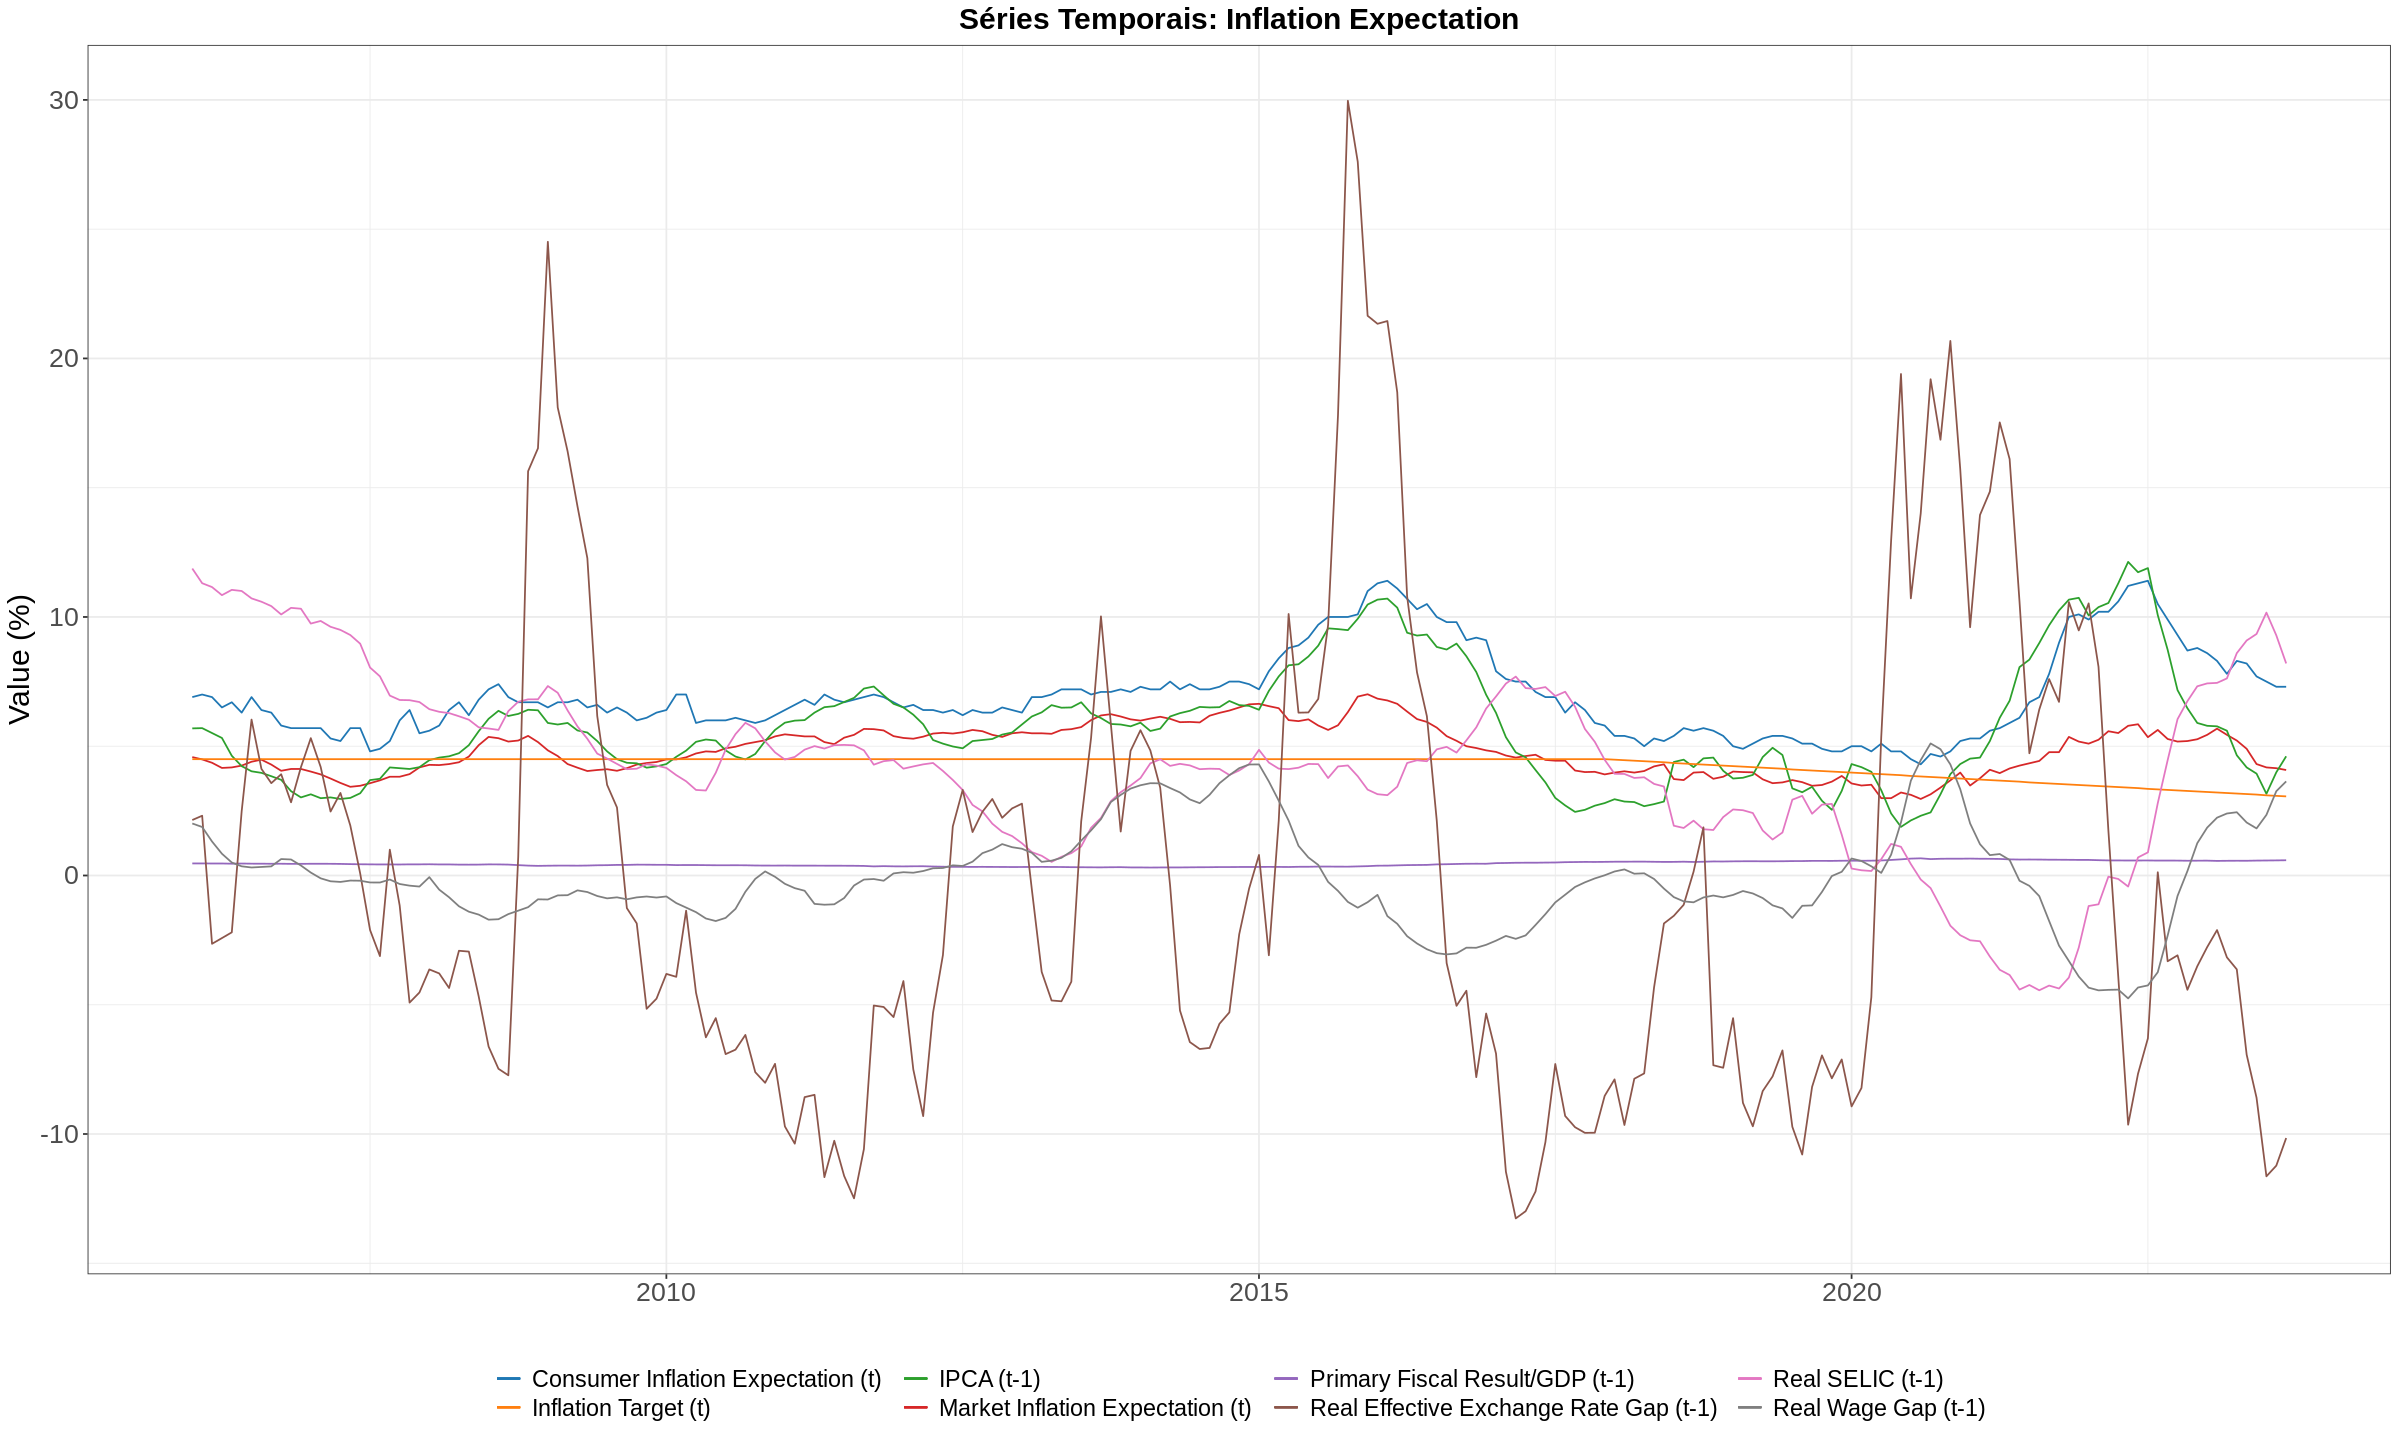

In [ ]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 20, repr.plot.height = 12)

# Plotar as séries temporais
ggplot(df_public_data) +
  geom_line(aes(x = month, y = consumer_inflation_expectation, color = "Consumer Inflation Expectation (t)")) +
  geom_line(aes(x = month, y = market_inflation_expectation, color = "Market Inflation Expectation (t)")) +
  geom_line(aes(x = month, y = ipca_lag, color = "IPCA (t-1)")) +
  geom_line(aes(x = month, y = inflation_target_wtd_avg, color = "Inflation Target (t)")) +
  geom_line(aes(x = month, y = primary_fiscal_result_to_gdp_lag, color = "Primary Fiscal Result/GDP (t-1)")) +
  geom_line(aes(x = month, y = selic_deflated_lag, color = "Real SELIC (t-1)")) +
  geom_line(aes(x = month, y = real_exchange_rate_gap_lag, color = "Real Effective Exchange Rate Gap (t-1)")) +
  geom_line(aes(x = month, y = real_household_income_gap_lag, color = "Real Wage Gap (t-1)")) +
  labs(x = "", y = "Value (%)", title = "Séries Temporais: Inflation Expectation") +
  scale_color_manual(values = c("#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f"), name = "") +
  theme_bw() +
  theme(legend.position = "bottom",
        legend.text = element_text(size = 14),
        legend.title = element_blank(),
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.caption = element_text(size = 14))

> ### **Regressão Linear Múltipla**

> **Equação do modelo econométrico proposto para responder a pergunta**

\begin{align*}
\text{inflation_expectation}_t
&=
\alpha_1 \cdot \text{IPCA}_{t-1} \\
&+ \alpha_2 \cdot \text{Inflation Target}_{t} \\
&+ \alpha_3 \cdot \text{Primary Fiscal Result/GDP}_{t-1} \\
&+ \alpha_4 \cdot \text{Real SELIC}_{t-1} \\
&+ \alpha_5 \cdot \text{Real Effective Exchange Rate Gap}_{t-1} \\
&+ \alpha_6 \cdot \text{Real Wage Gap}_{t-1} \\
&+ \alpha_7 \cdot \text{Consumer Confidence Index}_{t-1} \\
&+ ɛ_i
\end{align*}

> **Teste de hipótese para cada ${\alpha_n}$ com $n = [1, 7]$**

  - ${H}_0: \alpha_n = 0$
  - ${H}_a: \alpha_n \neq 0$

> **Nível de significância**

- **β** = 5%

> **Modelo econométrico**

In [ ]:
consumer_linear_model = lm(consumer_inflation_expectation ~
    ipca_lag + inflation_target_wtd_avg + primary_fiscal_result_to_gdp_lag + selic_deflated_lag + real_exchange_rate_gap_lag + real_household_income_gap_lag + consumer_confidence_index_lag - 1,
    data = df_public_data)

market_linear_model = lm(market_inflation_expectation ~
    ipca_lag + inflation_target_wtd_avg + primary_fiscal_result_to_gdp_lag + selic_deflated_lag + real_exchange_rate_gap_lag + real_household_income_gap_lag + consumer_confidence_index_lag - 1,
    data = df_public_data)

In [ ]:
summary( consumer_linear_model )


Call:
lm(formula = consumer_inflation_expectation ~ ipca_lag + inflation_target_wtd_avg + 
    primary_fiscal_result_to_gdp_lag + selic_deflated_lag + real_exchange_rate_gap_lag + 
    real_household_income_gap_lag + consumer_confidence_index_lag - 
    1, data = df_public_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.69268 -0.41010  0.02014  0.48507  1.34633 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
ipca_lag                          0.791363   0.020814  38.020  < 2e-16 ***
inflation_target_wtd_avg          0.397899   0.093132   4.272 2.95e-05 ***
primary_fiscal_result_to_gdp_lag  3.338981   0.320537  10.417  < 2e-16 ***
selic_deflated_lag                0.176251   0.013986  12.602  < 2e-16 ***
real_exchange_rate_gap_lag       -0.012877   0.005950  -2.164 0.031597 *  
real_household_income_gap_lag     0.076752   0.025221   3.043 0.002646 ** 
consumer_confidence_index_lag    -0.016622   0.004234  -3.925 0.000118 ***


In [ ]:
tidy( consumer_linear_model )

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ipca_lag,0.79136347,0.020814340,38.020110,4.562086e-95
inflation_target_wtd_avg,0.39789866,0.093131940,4.272419,2.953442e-05
primary_fiscal_result_to_gdp_lag,3.33898129,0.320536868,10.416840,1.105549e-20
selic_deflated_lag,0.17625132,0.013986109,12.601884,2.281218e-27
real_exchange_rate_gap_lag,-0.01287718,0.005950013,-2.164226,3.159730e-02
real_household_income_gap_lag,0.07675241,0.025221167,3.043174,2.645839e-03
consumer_confidence_index_lag,-0.01662159,0.004234381,-3.925388,1.180363e-04


**Resultado**

- Todas as variáveis são estatisticamente significativas dado o nível de significância β escolhido.

In [ ]:
summary( market_linear_model )


Call:
lm(formula = market_inflation_expectation ~ ipca_lag + inflation_target_wtd_avg + 
    primary_fiscal_result_to_gdp_lag + selic_deflated_lag + real_exchange_rate_gap_lag + 
    real_household_income_gap_lag + consumer_confidence_index_lag - 
    1, data = df_public_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.05055 -0.29184  0.03781  0.29137  0.92564 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
ipca_lag                          0.420975   0.013960  30.155  < 2e-16 ***
inflation_target_wtd_avg          0.498864   0.062464   7.986 9.66e-14 ***
primary_fiscal_result_to_gdp_lag -1.129808   0.214985  -5.255 3.68e-07 ***
selic_deflated_lag                0.030330   0.009381   3.233 0.001425 ** 
real_exchange_rate_gap_lag       -0.013535   0.003991  -3.392 0.000833 ***
real_household_income_gap_lag     0.196554   0.016916  11.619  < 2e-16 ***
consumer_confidence_index_lag     0.007774   0.002840   2.737 0.006738 ** 
--

In [ ]:
tidy( market_linear_model )

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ipca_lag,0.420975021,0.013960244,30.155277,1.712742e-77
inflation_target_wtd_avg,0.498863841,0.062463888,7.986436,9.658888e-14
primary_fiscal_result_to_gdp_lag,-1.129808346,0.214985096,-5.255287,3.680579e-07
selic_deflated_lag,0.030330479,0.009380527,3.233345,1.424920e-03
real_exchange_rate_gap_lag,-0.013535192,0.003990693,-3.391690,8.327280e-04
real_household_income_gap_lag,0.196554181,0.016915917,11.619482,2.486280e-24
consumer_confidence_index_lag,0.007773729,0.002840013,2.737217,6.737940e-03


**Resultado**

- Todas as variáveis são estatisticamente significativas dado o nível de significância β escolhido.

> ### **Distribuição dos Resíduos**

In [ ]:
consumer_residuals <- residuals(consumer_linear_model)
consumer_residuals_df <- consumer_residuals %>% as.data.frame()  %>% rename(residuals = ".")

market_residuals <- residuals(market_linear_model)
market_residuals_df <- market_residuals %>% as.data.frame()  %>% rename(residuals = ".")

In [ ]:
stargazer(consumer_residuals_df, digits = 2, type = "text")


Statistic  N  Mean St. Dev.  Min  Max 
--------------------------------------
residuals 213 0.01   0.60   -1.69 1.35
--------------------------------------


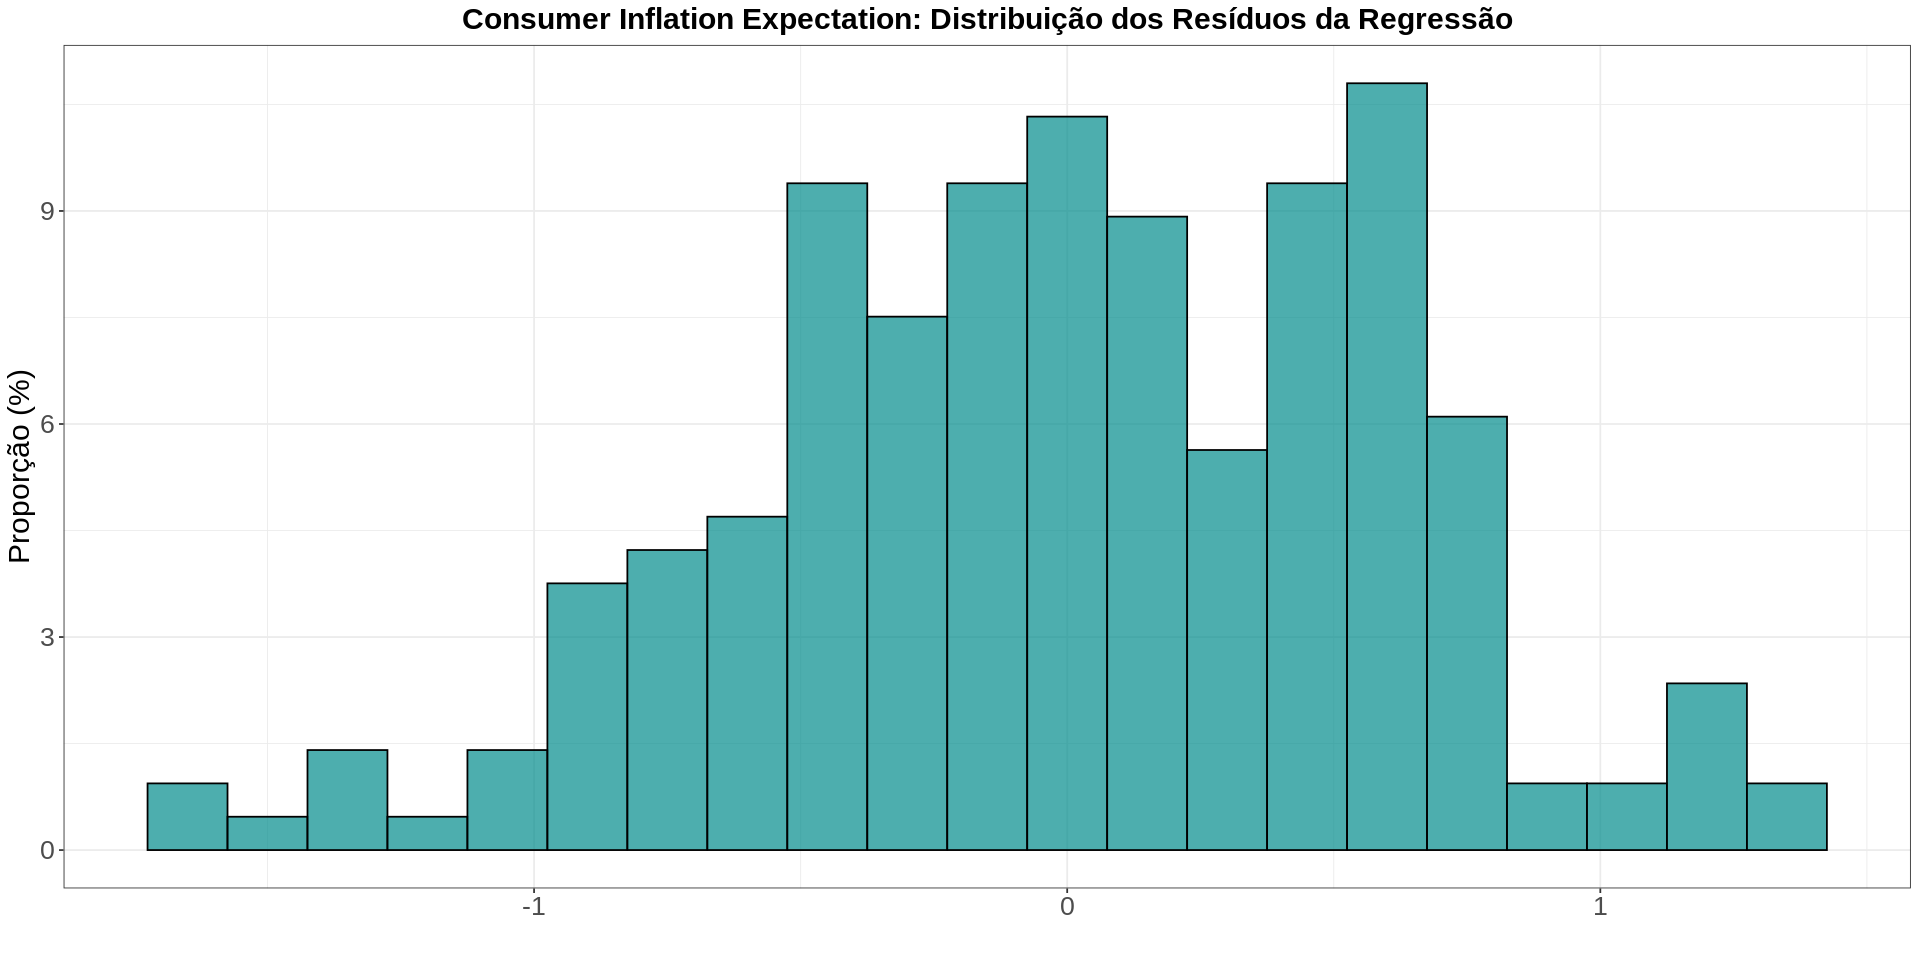

In [ ]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 16, repr.plot.height = 8)

# Plotar o histograma dos resíduos da regressão com valores relativos em %
ggplot(consumer_residuals_df, aes(x = residuals, y = 100 * after_stat(count) / sum(after_stat(count)))) +
  geom_histogram(binwidth = 0.15, color = "black", fill = "darkcyan", alpha = 0.7) +
  labs(title = "Consumer Inflation Expectation: Distribuição dos Resíduos da Regressão", x = "", y = "Proporção (%)") +
  theme_bw() +
  theme(plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.caption = element_text(size = 14))

In [ ]:
stargazer(market_residuals_df, digits = 2, type = "text")


Statistic  N  Mean  St. Dev.  Min  Max 
---------------------------------------
residuals 213 0.004   0.40   -1.05 0.93
---------------------------------------


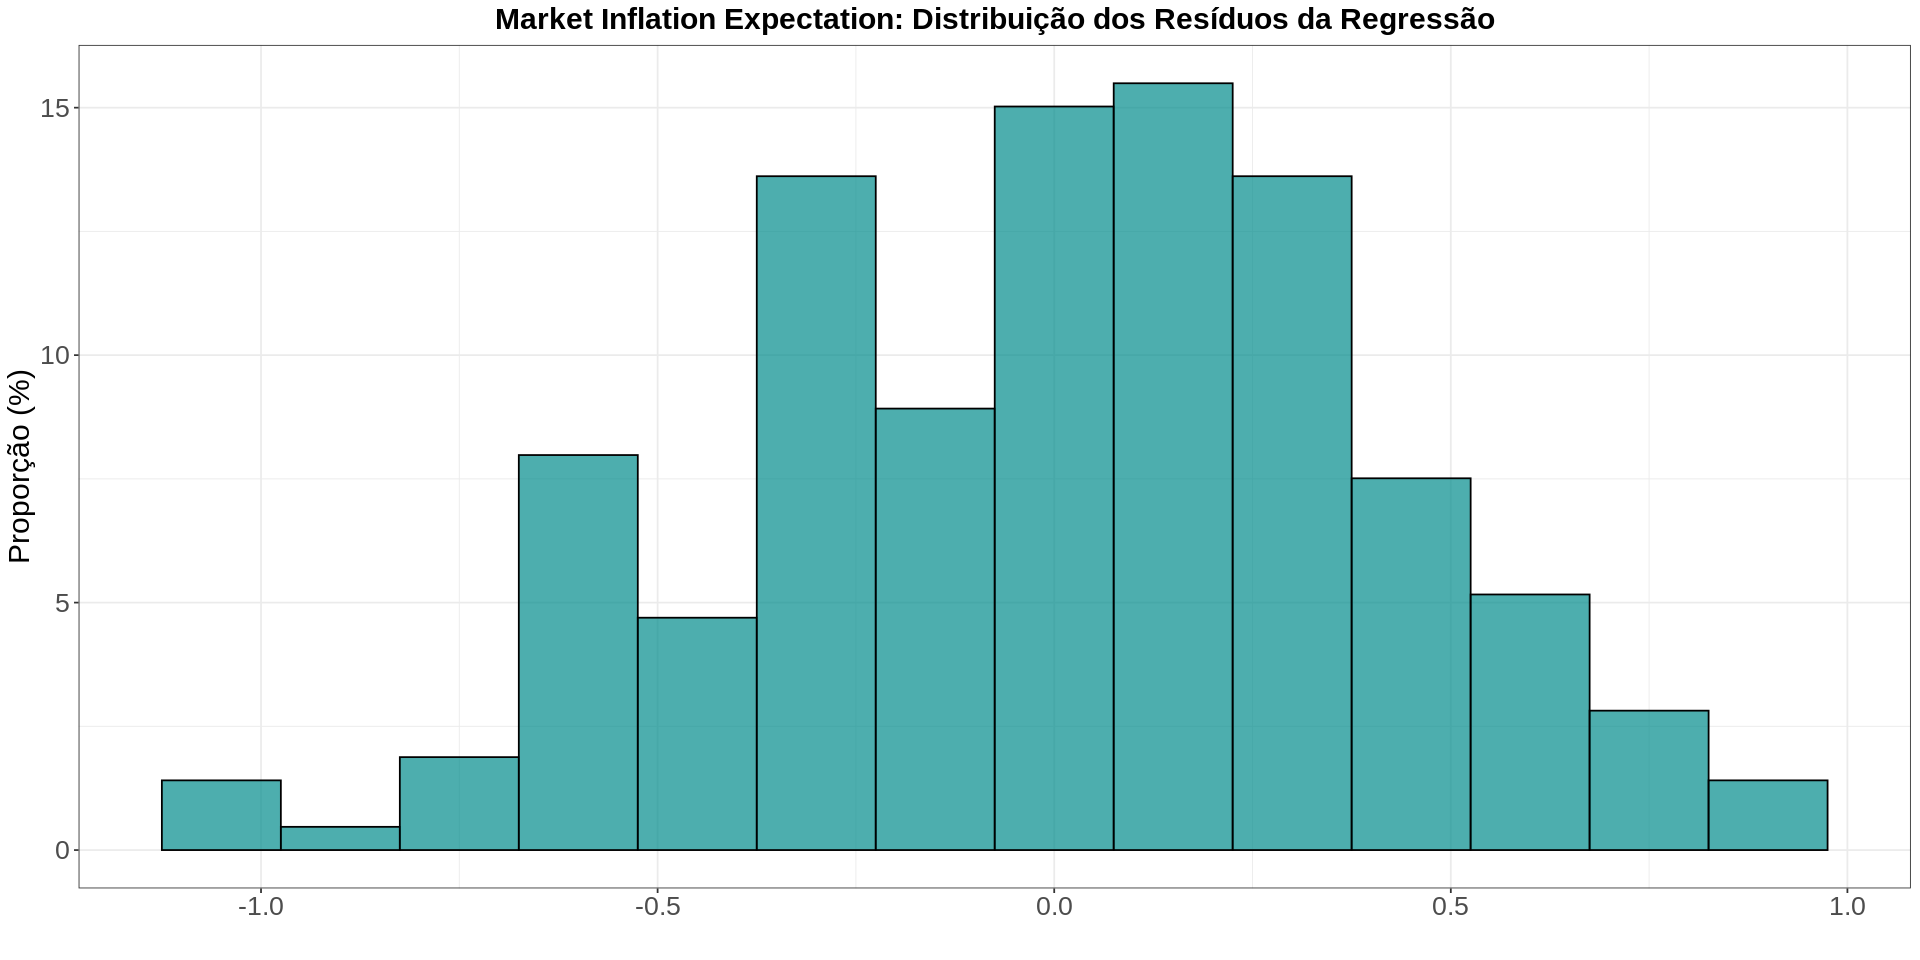

In [ ]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 16, repr.plot.height = 8)

# Plotar o market_residuals dos resíduos da regressão com valores relativos em %
ggplot(market_residuals_df, aes(x = residuals, y = 100 * after_stat(count) / sum(after_stat(count)))) +
  geom_histogram(binwidth = 0.15, color = "black", fill = "darkcyan", alpha = 0.7) +
  labs(title = "Market Inflation Expectation: Distribuição dos Resíduos da Regressão", x = "", y = "Proporção (%)") +
  theme_bw() +
  theme(plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.caption = element_text(size = 14))

> ### **Estacionariedade dos Resíduos**

> **ADF (Augmented Dickey-Fuller)**

- Nível de Significância
  * α = 5%

- Testes de Hipótese
  * **tau3**
    * Hipótese nula: possui raiz unitária
  * **phi2**
    * Hipótese nula: possui raiz unitária, sem tendência e sem drift
  * **phi3**
    * Hipótese nula: possui raiz unitária e sem tendência

In [ ]:
summary( ur.df( consumer_residuals, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.00431 -0.16711  0.00815  0.17352  1.05157 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.0326680  0.0514742  -0.635 0.526442    
z.lag.1      -0.2256058  0.0654819  -3.445 0.000706 ***
tt            0.0003853  0.0004108   0.938 0.349471    
z.diff.lag1   0.0509155  0.0828149   0.615 0.539435    
z.diff.lag2   0.0322950  0.0830890   0.389 0.697960    
z.diff.lag3   0.0841490  0.0822765   1.023 0.307757    
z.diff.lag4  -0.0030119  0.0818916  -0.037 0.970701    
z.diff.lag5   0.1047371  0.0798055   1.312 0.191010    
z.diff.lag6   0.0622648  0.0801737   0.777 0.438373    
z.diff.lag7   0.0596355  0.0777539   0.767 0.444073    
z.diff.lag8  -0.0280071  0.07771

#### **Resultado**

- Como os valores de test-statistic são menores, em módulo, que tau3, phi2 e phi3 para um nível de significância de 5%, não se rejeita as hipóteses nulas, ou seja, os resíduos possuem raiz unitária, o que implica que os resíduos não são estacionários.

In [ ]:
summary( ur.df( market_residuals, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.90515 -0.12158  0.01367  0.10986  0.83976 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.0212949  0.0365693  -0.582  0.56106    
z.lag.1      -0.2589373  0.0838807  -3.087  0.00233 ** 
tt            0.0002707  0.0002957   0.915  0.36130    
z.diff.lag1   0.2292188  0.0934524   2.453  0.01510 *  
z.diff.lag2  -0.0219349  0.0945719  -0.232  0.81684    
z.diff.lag3   0.0911647  0.0900052   1.013  0.31244    
z.diff.lag4  -0.0159749  0.0908739  -0.176  0.86065    
z.diff.lag5  -0.0190053  0.0867717  -0.219  0.82687    
z.diff.lag6   0.0029494  0.0830883   0.035  0.97172    
z.diff.lag7  -0.0796125  0.0807866  -0.985  0.32568    
z.diff.lag8  -0.1317278  0.07757

#### **Resultado**

- Como os valores de test-statistic são menores, em módulo, que tau3, phi2 e phi3 para um nível de significância de 5%, não se rejeita as hipóteses nulas, ou seja, os resíduos possuem raiz unitária, o que implica que os resíduos não são estacionários.

> **KPSS (Kwiatkowski-Phillips-Schmidt-Shin)**

- Nível de Significância
  * α = 5%

- Teste de Hipótese
  * $H_0$: não possui raiz unitária

In [ ]:
summary( ur.kpss( consumer_residuals, type = "tau", lags = "short") )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.1889 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


**Resultado**

- Como o valor de test-statistic é maior que o valor crítico para um nível de significância de 5%, rejeita-se a hipótese nula, ou seja, os resíduos possuem raiz unitária, o que implica que os resíduos não são estacionários.

In [ ]:
summary( ur.kpss( market_residuals, type = "tau", lags = "short") )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.2005 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


**Resultado**

- Como o valor de test-statistic é maior que o valor crítico para um nível de significância de 5%, rejeita-se a hipótese nula, ou seja, os resíduos possuem raiz unitária, o que implica que os resíduos não são estacionários.

> ### **Análise de Coeficientes**

In [ ]:
# Consumer Inflation Expectation

# Extrair os coeficientes do modelo linear
consumer_coefficients <- coef(consumer_linear_model)

consumer_model_ipca_lag_weight <- consumer_coefficients[1]
consumer_model_inflation_target_wtd_avg_weight <- consumer_coefficients[2]
consumer_model_primary_fiscal_result_to_gdp_lag_weight <- consumer_coefficients[3]
consumer_model_selic_deflated_lag_weight <- consumer_coefficients[4]
consumer_model_real_exchange_rate_gap_lag_weight <- consumer_coefficients[5]
consumer_model_real_household_income_gap_lag_weight <- consumer_coefficients[6]
consumer_model_consumer_confidence_index_lag_weight <- consumer_coefficients[7]

# Dataset para análise da previsão
consumer_analysis <- df_public_data %>% select(month, consumer_inflation_expectation, ipca_lag, inflation_target_wtd_avg, primary_fiscal_result_to_gdp_lag, selic_deflated_lag, real_exchange_rate_gap_lag, real_household_income_gap_lag, consumer_confidence_index_lag)

consumer_analysis$ipca_lag <- consumer_analysis$ipca_lag * consumer_model_ipca_lag_weight
consumer_analysis$inflation_target_wtd_avg <- consumer_analysis$inflation_target_wtd_avg * consumer_model_inflation_target_wtd_avg_weight
consumer_analysis$primary_fiscal_result_to_gdp_lag <- consumer_analysis$primary_fiscal_result_to_gdp_lag * consumer_model_primary_fiscal_result_to_gdp_lag_weight
consumer_analysis$selic_deflated_lag <- consumer_analysis$selic_deflated_lag * consumer_model_selic_deflated_lag_weight
consumer_analysis$real_exchange_rate_gap_lag <- consumer_analysis$real_exchange_rate_gap_lag * consumer_model_real_exchange_rate_gap_lag_weight
consumer_analysis$real_household_income_gap_lag <- consumer_analysis$real_household_income_gap_lag * consumer_model_real_household_income_gap_lag_weight
consumer_analysis$consumer_confidence_index_lag <- consumer_analysis$consumer_confidence_index_lag * consumer_model_consumer_confidence_index_lag_weight

consumer_analysis$consumer_inflation_expectation_predicted <- consumer_analysis$ipca_lag + consumer_analysis$inflation_target_wtd_avg + consumer_analysis$primary_fiscal_result_to_gdp_lag + consumer_analysis$selic_deflated_lag + consumer_analysis$real_exchange_rate_gap_lag + consumer_analysis$real_household_income_gap_lag + consumer_analysis$consumer_confidence_index_lag

# Impacto de cada variável
consumer_analysis_pct <- consumer_analysis %>% select(month)

consumer_analysis_pct$ipca <- 100.0 * abs(consumer_analysis$ipca_lag) / (abs(consumer_analysis$ipca_lag) + abs(consumer_analysis$inflation_target_wtd_avg) + abs(consumer_analysis$primary_fiscal_result_to_gdp_lag) + abs(consumer_analysis$selic_deflated_lag) + abs(consumer_analysis$real_exchange_rate_gap_lag) + abs(consumer_analysis$real_household_income_gap_lag) + abs(consumer_analysis$consumer_confidence_index_lag))
consumer_analysis_pct$inflation_target <- 100.0 * abs(consumer_analysis$inflation_target_wtd_avg) / (abs(consumer_analysis$ipca_lag) + abs(consumer_analysis$inflation_target_wtd_avg) + abs(consumer_analysis$primary_fiscal_result_to_gdp_lag) + abs(consumer_analysis$selic_deflated_lag) + abs(consumer_analysis$real_exchange_rate_gap_lag) + abs(consumer_analysis$real_household_income_gap_lag) + abs(consumer_analysis$consumer_confidence_index_lag))
consumer_analysis_pct$primary_fiscal_result_to_gdp <- 100.0 * abs(consumer_analysis$primary_fiscal_result_to_gdp_lag) / (abs(consumer_analysis$ipca_lag) + abs(consumer_analysis$inflation_target_wtd_avg) + abs(consumer_analysis$primary_fiscal_result_to_gdp_lag) + abs(consumer_analysis$selic_deflated_lag) + abs(consumer_analysis$real_exchange_rate_gap_lag) + abs(consumer_analysis$real_household_income_gap_lag) + abs(consumer_analysis$consumer_confidence_index_lag))
consumer_analysis_pct$selic_deflated <- 100.0 * abs(consumer_analysis$selic_deflated_lag) / (abs(consumer_analysis$ipca_lag) + abs(consumer_analysis$inflation_target_wtd_avg) + abs(consumer_analysis$primary_fiscal_result_to_gdp_lag) + abs(consumer_analysis$selic_deflated_lag) + abs(consumer_analysis$real_exchange_rate_gap_lag) + abs(consumer_analysis$real_household_income_gap_lag) + abs(consumer_analysis$consumer_confidence_index_lag))
consumer_analysis_pct$real_exchange_rate_gap <- 100.0 * abs(consumer_analysis$real_exchange_rate_gap_lag) / (abs(consumer_analysis$ipca_lag) + abs(consumer_analysis$inflation_target_wtd_avg) + abs(consumer_analysis$primary_fiscal_result_to_gdp_lag) + abs(consumer_analysis$selic_deflated_lag) + abs(consumer_analysis$real_exchange_rate_gap_lag) + abs(consumer_analysis$real_household_income_gap_lag) + abs(consumer_analysis$consumer_confidence_index_lag))
consumer_analysis_pct$real_household_income_gap <- 100.0 * abs(consumer_analysis$real_household_income_gap_lag) / (abs(consumer_analysis$ipca_lag) + abs(consumer_analysis$inflation_target_wtd_avg) + abs(consumer_analysis$primary_fiscal_result_to_gdp_lag) + abs(consumer_analysis$selic_deflated_lag) + abs(consumer_analysis$real_exchange_rate_gap_lag) + abs(consumer_analysis$real_household_income_gap_lag) + abs(consumer_analysis$consumer_confidence_index_lag))
consumer_analysis_pct$consumer_confidence_index <- 100.0 * abs(consumer_analysis$consumer_confidence_index_lag) / (abs(consumer_analysis$ipca_lag) + abs(consumer_analysis$inflation_target_wtd_avg) + abs(consumer_analysis$primary_fiscal_result_to_gdp_lag) + abs(consumer_analysis$selic_deflated_lag) + abs(consumer_analysis$real_exchange_rate_gap_lag) + abs(consumer_analysis$real_household_income_gap_lag) + abs(consumer_analysis$consumer_confidence_index_lag))

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


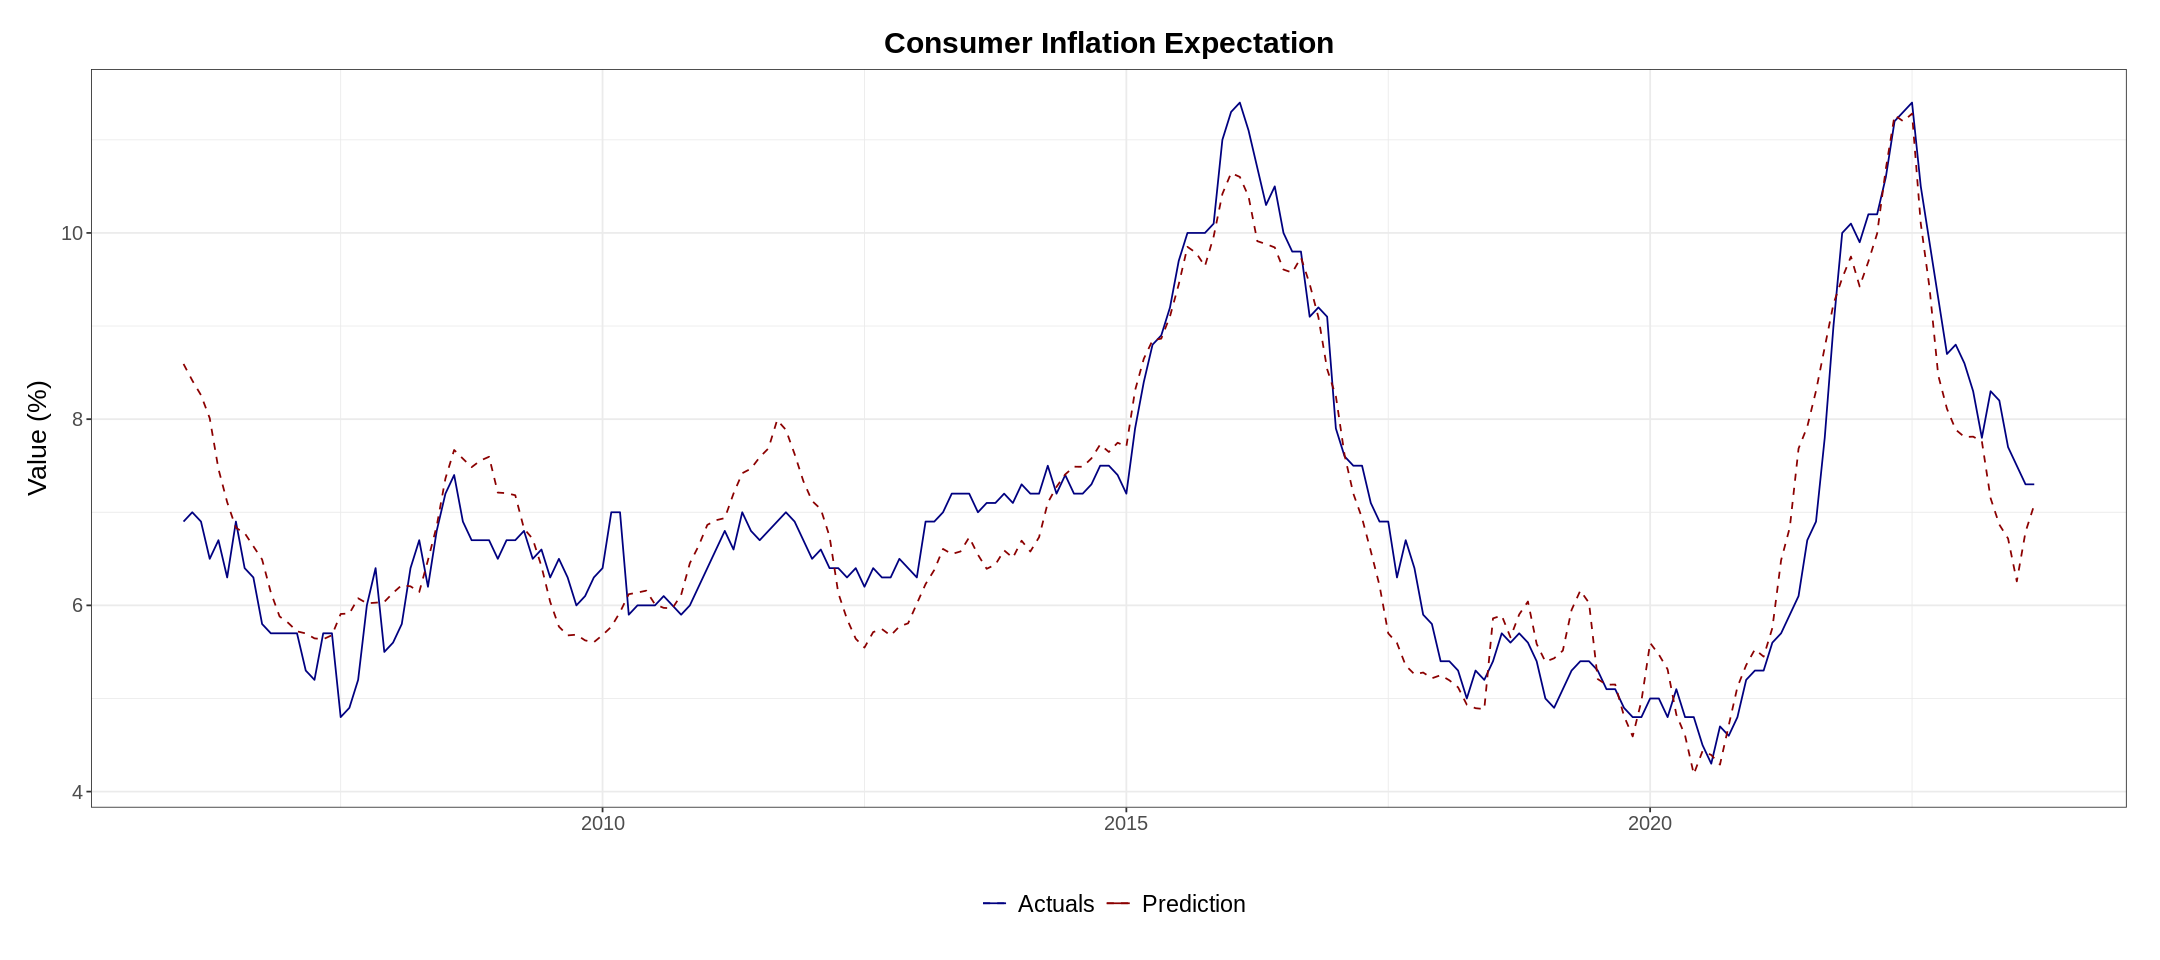

In [ ]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 18, repr.plot.height = 8)

# Plotar as séries temporais de "consumer_inflation_expectation" e "consumer_inflation_expectation_predicted"
ggplot(consumer_analysis) +
  geom_line(aes(x = month, y = consumer_inflation_expectation, color = "Actuals")) +
  geom_line(aes(x = month, y = consumer_inflation_expectation_predicted, color = "Prediction"), linetype = "dashed") +
  labs(x = "", y = "Value (%)", title = "Consumer Inflation Expectation") +
  scale_color_manual(values = c("navy", "darkred"), name = "") +
  theme_bw() +
  theme(
    legend.position = "bottom",
    legend.text = element_text(size = 14),
    legend.title = element_blank(),
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
    axis.text = element_text(size = 12),
    axis.title.y = element_text(size = 16, vjust = 2),
    axis.title.x = element_text(size = 14),
    plot.caption = element_text(size = 10),
    plot.margin = margin(20, 20, 20, 20)
  )

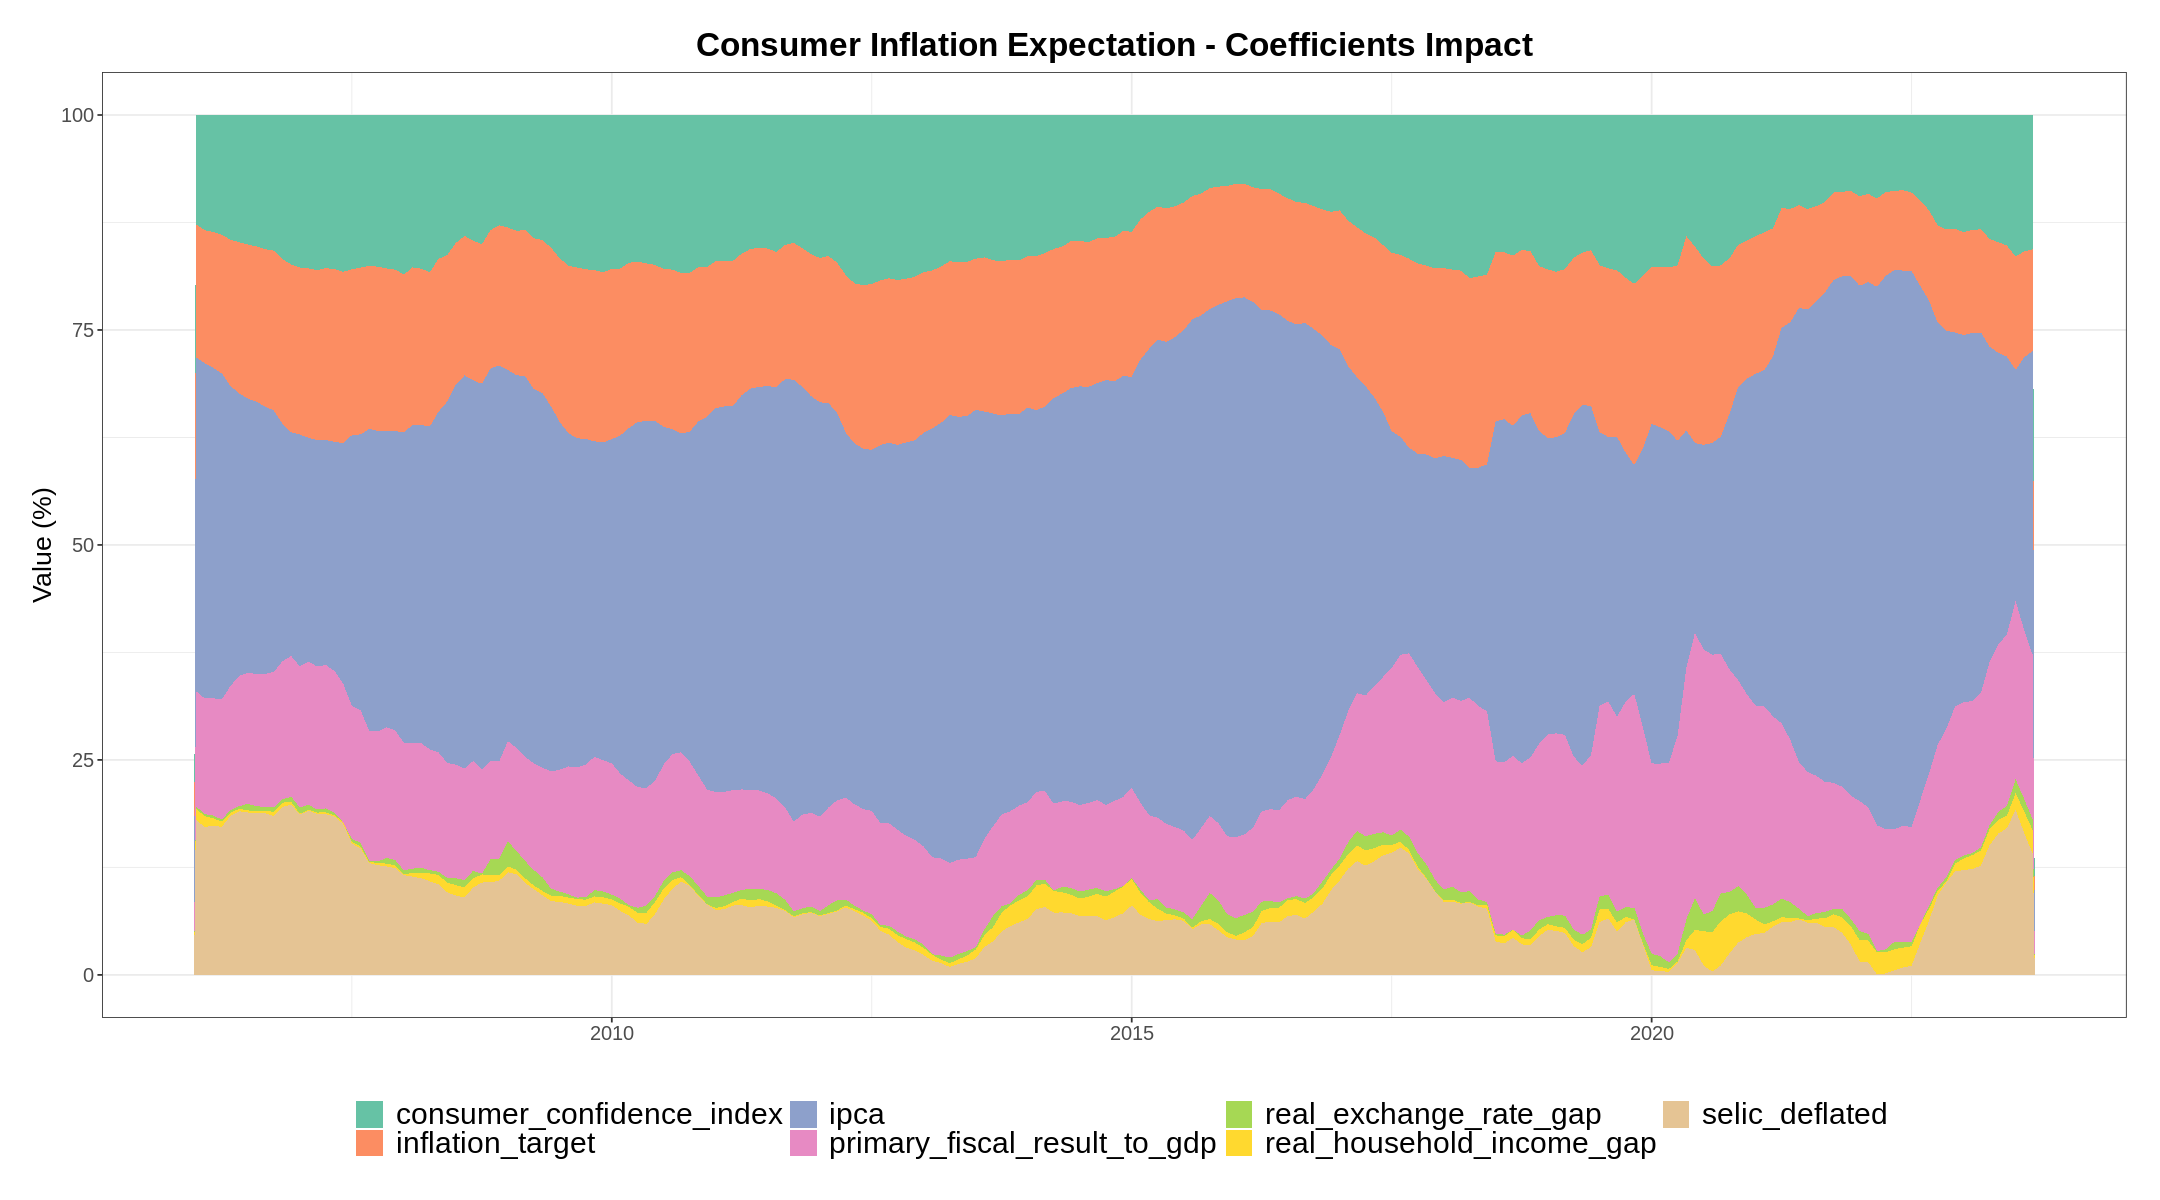

In [ ]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 18, repr.plot.height = 10)

# Transforme o dataframe em um formato longo (tidy data)
consumer_analysis_pct_long <- consumer_analysis_pct %>%
  pivot_longer(cols = -month, names_to = "Variable", values_to = "Value")

# Use a paleta de cores Set1
set2_palette <- brewer.pal(n = 7, name = "Set2")

# Crie o gráfico de área empilhada com a paleta de cores Set1
ggplot(consumer_analysis_pct_long, aes(x = month, y = Value, fill = Variable)) +
  geom_area() +
  labs(x = "", y = "Value (%)", title = "Consumer Inflation Expectation - Coefficients Impact") +
  scale_fill_manual(values = set2_palette, name = "") +
  theme_bw() +
  theme(
    legend.position = "bottom",
    legend.text = element_text(size = 18),
    legend.title = element_text(size = 14),
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
    axis.text = element_text(size = 12),
    axis.title.y = element_text(size = 16, vjust = 1),
    axis.title.x = element_text(size = 16),
    plot.caption = element_text(size = 12),
    plot.margin = margin(20, 20, 20, 20)
  )

In [ ]:
# Market Inflation Expectation

# Extrair os coeficientes do modelo linear
market_coefficients <- coef(market_linear_model)

market_model_ipca_lag_weight <- market_coefficients[1]
market_model_inflation_target_wtd_avg_weight <- market_coefficients[2]
market_model_primary_fiscal_result_to_gdp_lag_weight <- market_coefficients[3]
market_model_selic_deflated_lag_weight <- market_coefficients[4]
market_model_real_exchange_rate_gap_lag_weight <- market_coefficients[5]
market_model_real_household_income_gap_lag_weight <- market_coefficients[6]
market_model_consumer_confidence_index_lag_weight <- market_coefficients[7]

# Dataset para análise da previsão
market_analysis <- df_public_data %>% select(month, market_inflation_expectation, ipca_lag, inflation_target_wtd_avg, primary_fiscal_result_to_gdp_lag, selic_deflated_lag, real_exchange_rate_gap_lag, real_household_income_gap_lag, consumer_confidence_index_lag)

market_analysis$ipca_lag <- market_analysis$ipca_lag * market_model_ipca_lag_weight
market_analysis$inflation_target_wtd_avg <- market_analysis$inflation_target_wtd_avg * market_model_inflation_target_wtd_avg_weight
market_analysis$primary_fiscal_result_to_gdp_lag <- market_analysis$primary_fiscal_result_to_gdp_lag * market_model_primary_fiscal_result_to_gdp_lag_weight
market_analysis$selic_deflated_lag <- market_analysis$selic_deflated_lag * market_model_selic_deflated_lag_weight
market_analysis$real_exchange_rate_gap_lag <- market_analysis$real_exchange_rate_gap_lag * market_model_real_exchange_rate_gap_lag_weight
market_analysis$real_household_income_gap_lag <- market_analysis$real_household_income_gap_lag * market_model_real_household_income_gap_lag_weight
market_analysis$consumer_confidence_index_lag <- market_analysis$consumer_confidence_index_lag * market_model_consumer_confidence_index_lag_weight

market_analysis$market_inflation_expectation_predicted <- market_analysis$ipca_lag + market_analysis$inflation_target_wtd_avg + market_analysis$primary_fiscal_result_to_gdp_lag + market_analysis$selic_deflated_lag + market_analysis$real_exchange_rate_gap_lag + market_analysis$real_household_income_gap_lag + market_analysis$consumer_confidence_index_lag

# Impacto de cada variável
market_analysis_pct <- market_analysis %>% select(month)

market_analysis_pct$ipca <- 100.0 * abs(market_analysis$ipca_lag) / (abs(market_analysis$ipca_lag) + abs(market_analysis$inflation_target_wtd_avg) + abs(market_analysis$primary_fiscal_result_to_gdp_lag) + abs(market_analysis$selic_deflated_lag) + abs(market_analysis$real_exchange_rate_gap_lag) + abs(market_analysis$real_household_income_gap_lag) + abs(market_analysis$consumer_confidence_index_lag))
market_analysis_pct$inflation_target <- 100.0 * abs(market_analysis$inflation_target_wtd_avg) / (abs(market_analysis$ipca_lag) + abs(market_analysis$inflation_target_wtd_avg) + abs(market_analysis$primary_fiscal_result_to_gdp_lag) + abs(market_analysis$selic_deflated_lag) + abs(market_analysis$real_exchange_rate_gap_lag) + abs(market_analysis$real_household_income_gap_lag) + abs(market_analysis$consumer_confidence_index_lag))
market_analysis_pct$primary_fiscal_result_to_gdp <- 100.0 * abs(market_analysis$primary_fiscal_result_to_gdp_lag) / (abs(market_analysis$ipca_lag) + abs(market_analysis$inflation_target_wtd_avg) + abs(market_analysis$primary_fiscal_result_to_gdp_lag) + abs(market_analysis$selic_deflated_lag) + abs(market_analysis$real_exchange_rate_gap_lag) + abs(market_analysis$real_household_income_gap_lag) + abs(market_analysis$consumer_confidence_index_lag))
market_analysis_pct$selic_deflated <- 100.0 * abs(market_analysis$selic_deflated_lag) / (abs(market_analysis$ipca_lag) + abs(market_analysis$inflation_target_wtd_avg) + abs(market_analysis$primary_fiscal_result_to_gdp_lag) + abs(market_analysis$selic_deflated_lag) + abs(market_analysis$real_exchange_rate_gap_lag) + abs(market_analysis$real_household_income_gap_lag) + abs(market_analysis$consumer_confidence_index_lag))
market_analysis_pct$real_exchange_rate_gap <- 100.0 * abs(market_analysis$real_exchange_rate_gap_lag) / (abs(market_analysis$ipca_lag) + abs(market_analysis$inflation_target_wtd_avg) + abs(market_analysis$primary_fiscal_result_to_gdp_lag) + abs(market_analysis$selic_deflated_lag) + abs(market_analysis$real_exchange_rate_gap_lag) + abs(market_analysis$real_household_income_gap_lag) + abs(market_analysis$consumer_confidence_index_lag))
market_analysis_pct$real_household_income_gap <- 100.0 * abs(market_analysis$real_household_income_gap_lag) / (abs(market_analysis$ipca_lag) + abs(market_analysis$inflation_target_wtd_avg) + abs(market_analysis$primary_fiscal_result_to_gdp_lag) + abs(market_analysis$selic_deflated_lag) + abs(market_analysis$real_exchange_rate_gap_lag) + abs(market_analysis$real_household_income_gap_lag) + abs(market_analysis$consumer_confidence_index_lag))
market_analysis_pct$consumer_confidence_index <- 100.0 * abs(market_analysis$consumer_confidence_index_lag) / (abs(market_analysis$ipca_lag) + abs(market_analysis$inflation_target_wtd_avg) + abs(market_analysis$primary_fiscal_result_to_gdp_lag) + abs(market_analysis$selic_deflated_lag) + abs(market_analysis$real_exchange_rate_gap_lag) + abs(market_analysis$real_household_income_gap_lag) + abs(market_analysis$consumer_confidence_index_lag))

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


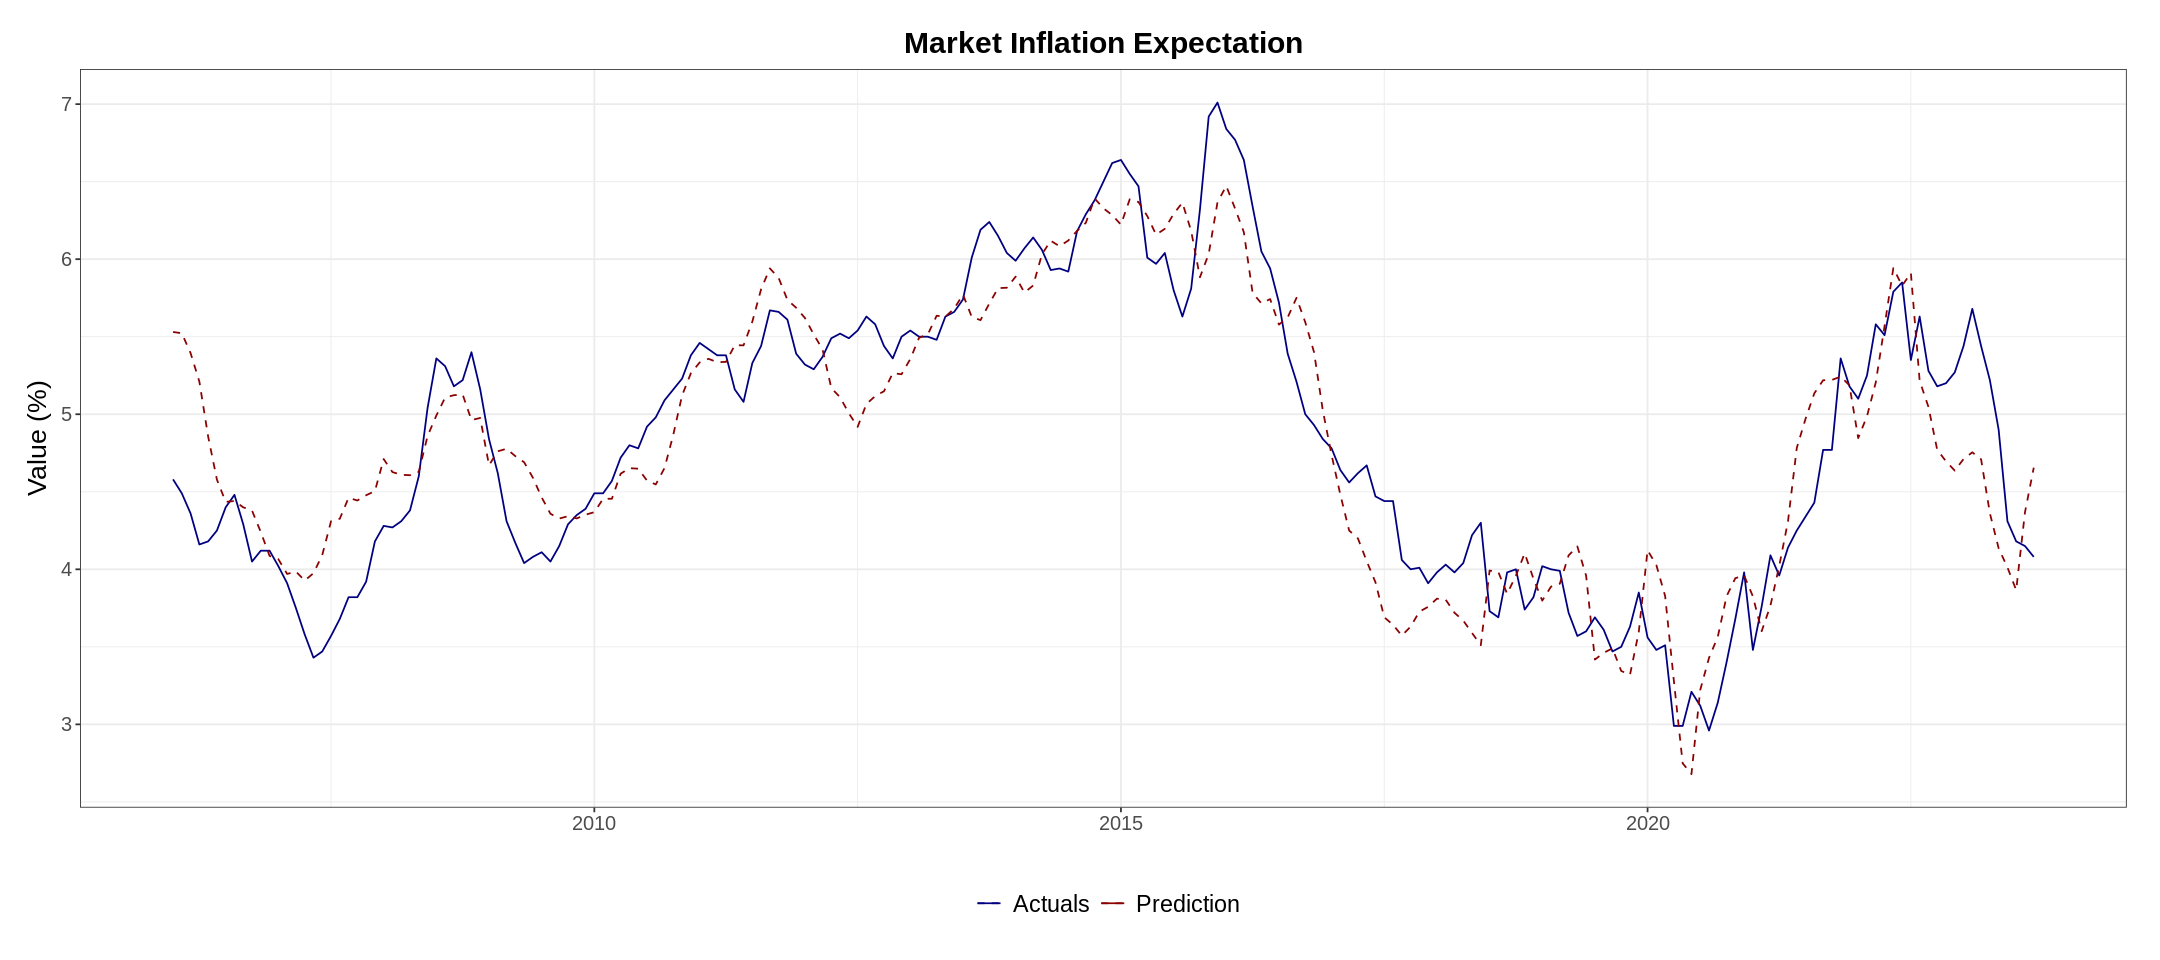

In [ ]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 18, repr.plot.height = 8)

# Plotar as séries temporais de "market_inflation_expectation" e "market_inflation_expectation_predicted"
ggplot(market_analysis) +
  geom_line(aes(x = month, y = market_inflation_expectation, color = "Actuals")) +
  geom_line(aes(x = month, y = market_inflation_expectation_predicted, color = "Prediction"), linetype = "dashed") +
  labs(x = "", y = "Value (%)", title = "Market Inflation Expectation") +
  scale_color_manual(values = c("navy", "darkred"), name = "") +
  theme_bw() +
  theme(
    legend.position = "bottom",
    legend.text = element_text(size = 14),
    legend.title = element_blank(),
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
    axis.text = element_text(size = 12),
    axis.title.y = element_text(size = 16, vjust = 2),
    axis.title.x = element_text(size = 14),
    plot.caption = element_text(size = 10),
    plot.margin = margin(20, 20, 20, 20)
  )

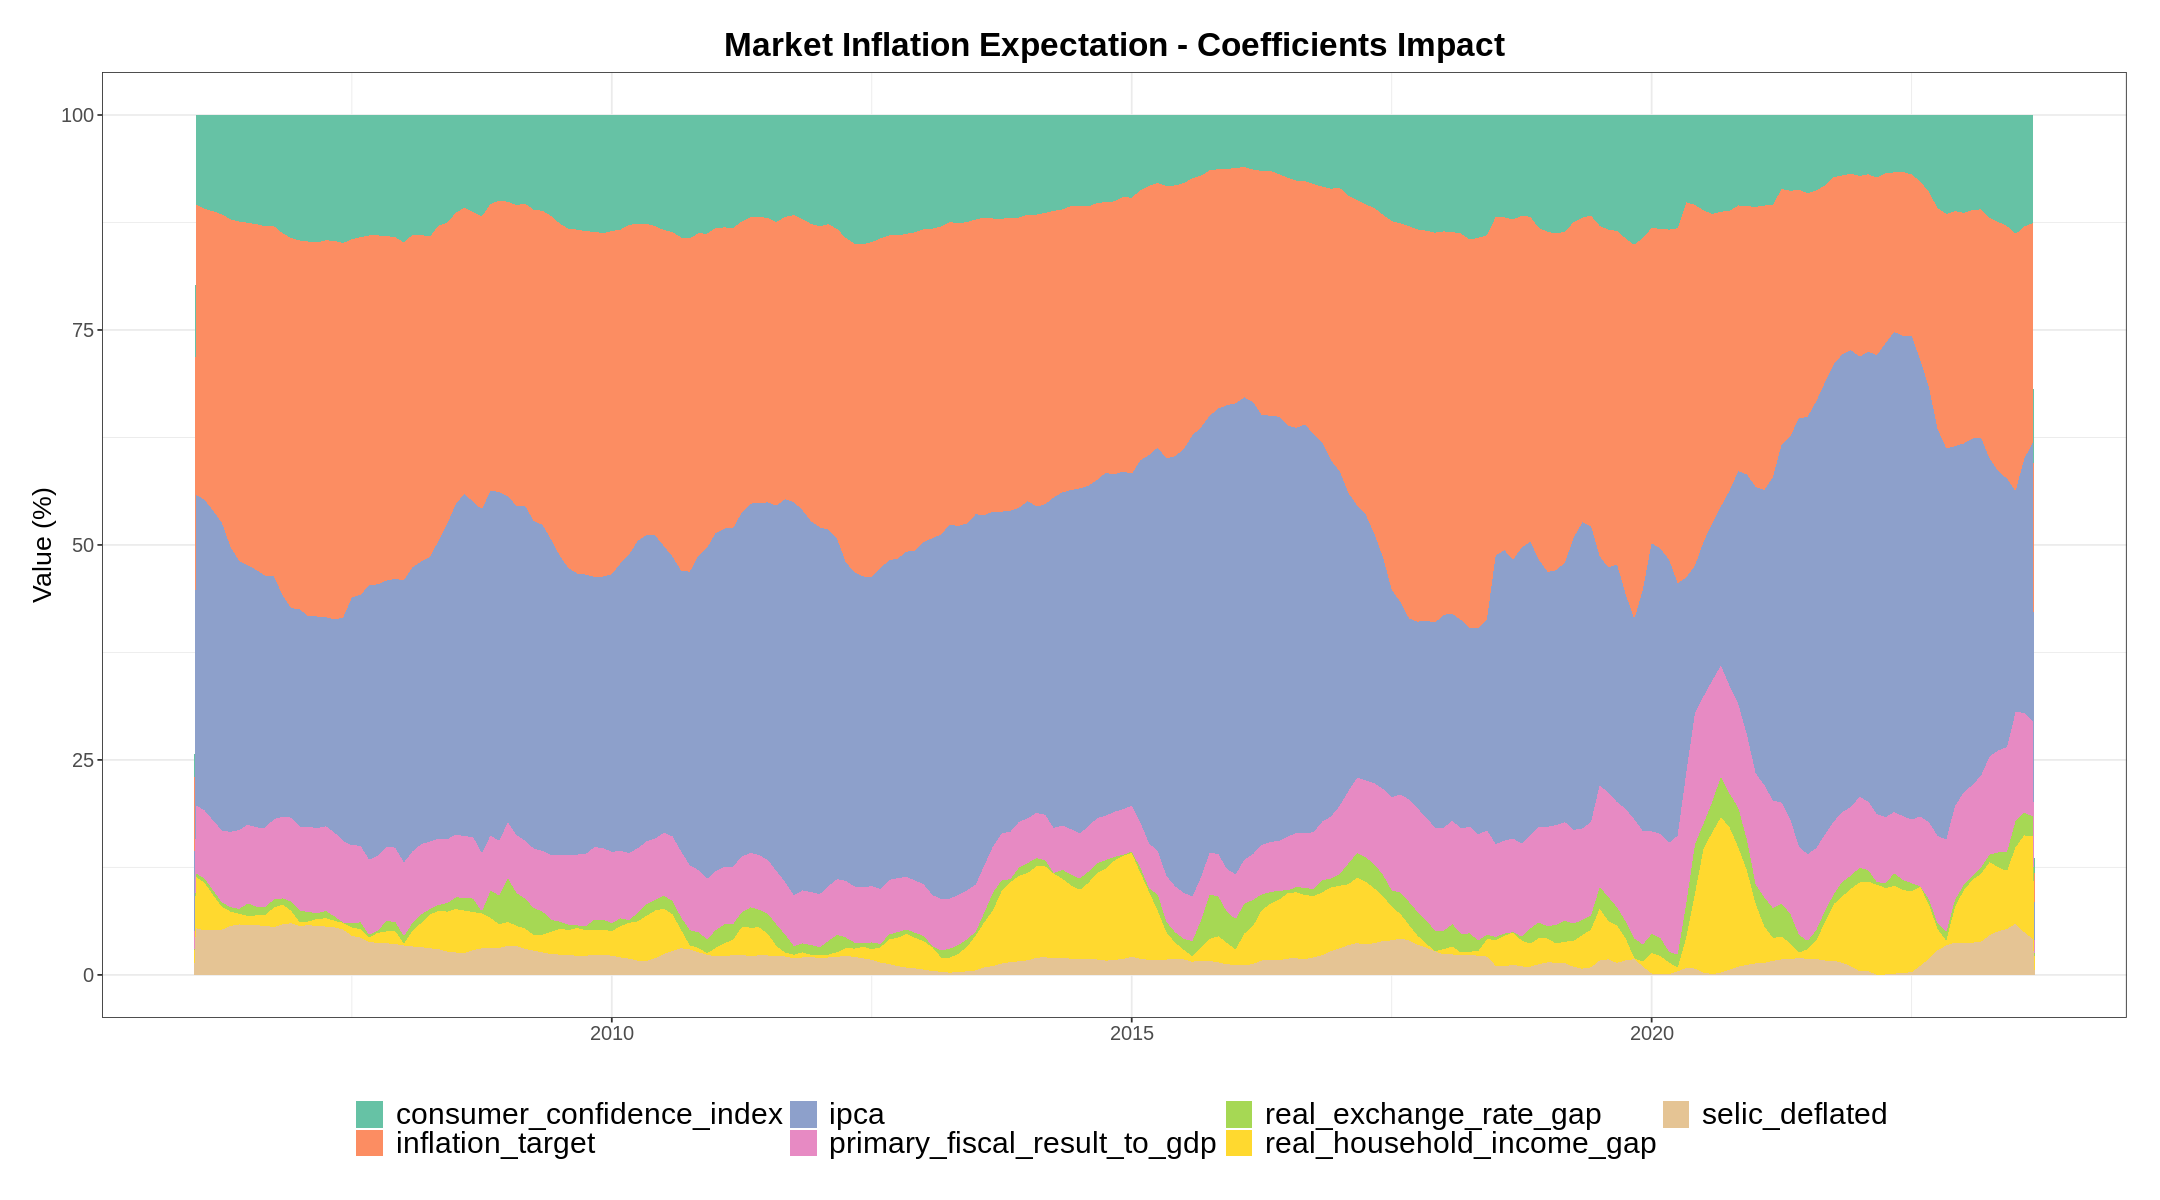

In [ ]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 18, repr.plot.height = 10)

# Transforme o dataframe em um formato longo (tidy data)
market_analysis_pct_long <- market_analysis_pct %>%
  pivot_longer(cols = -month, names_to = "Variable", values_to = "Value")

# Use a paleta de cores Set1
set2_palette <- brewer.pal(n = 7, name = "Set2")

# Crie o gráfico de área empilhada com a paleta de cores Set1
ggplot(market_analysis_pct_long, aes(x = month, y = Value, fill = Variable)) +
  geom_area() +
  labs(x = "", y = "Value (%)", title = "Market Inflation Expectation - Coefficients Impact") +
  scale_fill_manual(values = set2_palette, name = "") +
  theme_bw() +
  theme(
    legend.position = "bottom",
    legend.text = element_text(size = 18),
    legend.title = element_text(size = 14),
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
    axis.text = element_text(size = 12),
    axis.title.y = element_text(size = 16, vjust = 1),
    axis.title.x = element_text(size = 16),
    plot.caption = element_text(size = 12),
    plot.margin = margin(20, 20, 20, 20)
  )